In [4]:
import os 


In [5]:
import pandas as pd
import numpy as np



import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder


from scipy import stats

In [6]:
os.getcwd()

'c:\\Users\\DELL\\Downloads'

In [7]:
os.chdir('C:/Users/DELL')

In [8]:
df1=pd.read_csv('itineraries.csv')

In [9]:
df1.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,b3972452c388f0f3222177e0fc084f47,2022-04-18,2022-05-30,ORD,SFO,YA2AA,PT6H23M,0,False,False,...,1653932760||1653940140,2022-05-30T10:46:00.000-07:00||2022-05-30T12:4...,SNA||SFO,ORD||SNA,Alaska Airlines||Alaska Airlines,AS||AS,Boeing 737 MAX 8||Embraer 175,15600||5040,1726||373,coach||coach
1,143b066f4e707986872683942d0d0025,2022-04-18,2022-05-30,PHL,ATL,T21NXS2,PT2H11M,0,False,False,...,1653945780,2022-05-30T17:23:00.000-04:00,ATL,TTN,Frontier Airlines,F9,NaN,7860,701,coach
2,26e6f1ded26fa05a4f688a2b209bf5c4,2022-04-18,2022-05-30,PHL,ATL,RA3NR,PT2H9M,0,False,False,...,1653912540,2022-05-30T08:09:00.000-04:00,ATL,PHL,Spirit Airlines,NK,NaN,7740,NaN,coach
3,f6df81beeff0bf0c8ec8886b6bc17fbd,2022-04-18,2022-05-30,PHL,ATL,S21NXS2,PT2H10M,0,False,False,...,1653913800,2022-05-30T08:30:00.000-04:00,ATL,PHL,Frontier Airlines,F9,NaN,7800,667,coach
4,3c4f7362f7782e02112fe7d436ff813f,2022-04-18,2022-05-30,PHL,ATL,S21NXS2,PT2H18M,0,False,False,...,1653957780,2022-05-30T20:43:00.000-04:00,ATL,PHL,Frontier Airlines,F9,Airbus A321,8280,667,coach


In [10]:
df1.segmentsEquipmentDescription.isnull().sum()

18974

In [11]:
df1.shape

(1000000, 27)

In [12]:
df1.segmentsDistance.isnull().sum()


7613

In [13]:
df1.drop(columns=['searchDate','flightDate'],inplace=True)

In [14]:
df1.head()

,legId,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,b3972452c388f0f3222177e0fc084f47,ORD,SFO,YA2AA,PT6H23M,0,False,False,False,2195.72,...,1653932760||1653940140,2022-05-30T10:46:00.000-07:00||2022-05-30T12:4...,SNA||SFO,ORD||SNA,Alaska Airlines||Alaska Airlines,AS||AS,Boeing 737 MAX 8||Embraer 175,15600||5040,1726||373,coach||coach
1,143b066f4e707986872683942d0d0025,PHL,ATL,T21NXS2,PT2H11M,0,False,False,True,64.54,...,1653945780,2022-05-30T17:23:00.000-04:00,ATL,TTN,Frontier Airlines,F9,NaN,7860,701,coach
2,26e6f1ded26fa05a4f688a2b209bf5c4,PHL,ATL,RA3NR,PT2H9M,0,False,False,True,31.00,...,1653912540,2022-05-30T08:09:00.000-04:00,ATL,PHL,Spirit Airlines,NK,NaN,7740,NaN,coach
3,f6df81beeff0bf0c8ec8886b6bc17fbd,PHL,ATL,S21NXS2,PT2H10M,0,False,False,True,71.98,...,1653913800,2022-05-30T08:30:00.000-04:00,ATL,PHL,Frontier Airlines,F9,NaN,7800,667,coach
4,3c4f7362f7782e02112fe7d436ff813f,PHL,ATL,S21NXS2,PT2H18M,0,False,False,True,71.98,...,1653957780,2022-05-30T20:43:00.000-04:00,ATL,PHL,Frontier Airlines,F9,Airbus A321,8280,667,coach


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   legId                              1000000 non-null  object 
 1   startingAirport                    1000000 non-null  object 
 2   destinationAirport                 1000000 non-null  object 
 3   fareBasisCode                      1000000 non-null  object 
 4   travelDuration                     1000000 non-null  object 
 5   elapsedDays                        1000000 non-null  int64  
 6   isBasicEconomy                     1000000 non-null  bool   
 7   isRefundable                       1000000 non-null  bool   
 8   isNonStop                          1000000 non-null  bool   
 9   baseFare                           1000000 non-null  float64
 10  totalFare                          1000000 non-null  float64
 11  seatsRemaining           

In [16]:
df=df1.segmentsDistance
pd.DataFrame(df)


,segmentsDistance
0,1726||373
1,701
2,NaN
3,667
4,667
...,...
999995,556||93
999996,449||161
999997,107||515
999998,517||527


In [17]:
df.astype('object')

0         1726||373
1               701
2               NaN
3               667
4               667
            ...    
999995      556||93
999996     449||161
999997     107||515
999998     517||527
999999          762
Name: segmentsDistance, Length: 1000000, dtype: object

In [18]:
df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: segmentsDistance
Non-Null Count   Dtype 
--------------   ----- 
992387 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


In [19]:
emptycol=df1.isnull().sum()
emptycol

legId                                    0
startingAirport                          0
destinationAirport                       0
fareBasisCode                            0
travelDuration                           0
elapsedDays                              0
isBasicEconomy                           0
isRefundable                             0
isNonStop                                0
baseFare                                 0
totalFare                                0
seatsRemaining                           0
totalTravelDistance                  59338
segmentsDepartureTimeEpochSeconds        0
segmentsDepartureTimeRaw                 0
segmentsArrivalTimeEpochSeconds          0
segmentsArrivalTimeRaw                   0
segmentsArrivalAirportCode               0
segmentsDepartureAirportCode             0
segmentsAirlineName                      0
segmentsAirlineCode                      0
segmentsEquipmentDescription         18974
segmentsDurationInSeconds                0
segmentsDis

In [20]:
df=df1.dropna()
df

,legId,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,b3972452c388f0f3222177e0fc084f47,ORD,SFO,YA2AA,PT6H23M,0,False,False,False,2195.72,...,1653932760||1653940140,2022-05-30T10:46:00.000-07:00||2022-05-30T12:4...,SNA||SFO,ORD||SNA,Alaska Airlines||Alaska Airlines,AS||AS,Boeing 737 MAX 8||Embraer 175,15600||5040,1726||373,coach||coach
4,3c4f7362f7782e02112fe7d436ff813f,PHL,ATL,S21NXS2,PT2H18M,0,False,False,True,71.98,...,1653957780,2022-05-30T20:43:00.000-04:00,ATL,PHL,Frontier Airlines,F9,Airbus A321,8280,667,coach
5,4b7bd0d3549623855d7afc4abd47f80a,PHL,ATL,G14VXP5,PT9H32M,1,False,False,False,84.08,...,1653971640||1653996720,2022-05-31T00:34:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,||,9240||5520,860||399,coach||coach
6,7ebe4ea6b2007c91213fd55a088c0e53,PHL,ATL,G14VXP5,PT10H57M,0,False,False,False,84.08,...,1653916980||1653951120,2022-05-30T09:23:00.000-04:00||2022-05-30T18:5...,RDU||ATL,PHL||RDU,Frontier Airlines||Frontier Airlines,F9||F9,||,5280||5400,339||356,coach||coach
7,1f49270f62021dc225ec374ed67ff14e,PHL,ATL,G14VXP5,PT12H3M,1,False,False,False,84.08,...,1653963180||1653996720,2022-05-30T22:13:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,Airbus A321||,9840||5520,860||399,coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,91d149dd3cf2c59bcc26fbe79459cc8f,ATL,DTW,KA0QA0MQ,PT3H38M,0,False,False,False,481.86,...,1651236960||1651243980,2022-04-29T08:56:00.000-04:00||2022-04-29T10:5...,CLE||DTW,ATL||CLE,Delta||Delta,DL||DL,Airbus A319||Canadair Regional Jet 900,6060||3060,556||93,coach||coach
999996,4cf54fe477baef3dda572374daa8d84f,ATL,DTW,KA7QA0MQ,PT4H10M,0,False,False,False,528.38,...,1651236420||1651245900,2022-04-29T08:47:00.000-04:00||2022-04-29T11:2...,CMH||DTW,ATL||CMH,Delta||Delta,DL||DL,Boeing 737-900||Canadair Regional Jet 900,5520||3720,449||161,coach||coach
999997,2571238114ce6f22d45a393d9ede68db,ATL,DTW,KA7QA0MQ,PT8H42M,0,False,False,False,528.37,...,1651237080||1651265520,2022-04-29T08:58:00.000-04:00||2022-04-29T16:5...,CHA||DTW,ATL||CHA,Delta||Delta,DL||DL,Boeing 717||Canadair Regional Jet,2880||6660,107||515,coach||coach
999998,a57f5864c26f64cb4506f2ce7b824076,ATL,DTW,HA7QA0MQ,PT7H28M,0,False,False,False,714.42,...,1651237320||1651258680,2022-04-29T09:02:00.000-04:00||2022-04-29T14:5...,ORF||DTW,ATL||ORF,Delta||Delta,DL||DL,Airbus A320||Canadair Regional Jet 900,5520||6780,517||527,coach||coach


In [21]:
df.isnull().sum()

legId                                0
startingAirport                      0
destinationAirport                   0
fareBasisCode                        0
travelDuration                       0
elapsedDays                          0
isBasicEconomy                       0
isRefundable                         0
isNonStop                            0
baseFare                             0
totalFare                            0
seatsRemaining                       0
totalTravelDistance                  0
segmentsDepartureTimeEpochSeconds    0
segmentsDepartureTimeRaw             0
segmentsArrivalTimeEpochSeconds      0
segmentsArrivalTimeRaw               0
segmentsArrivalAirportCode           0
segmentsDepartureAirportCode         0
segmentsAirlineName                  0
segmentsAirlineCode                  0
segmentsEquipmentDescription         0
segmentsDurationInSeconds            0
segmentsDistance                     0
segmentsCabinCode                    0
dtype: int64

In [22]:
df.head(20)

,legId,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,b3972452c388f0f3222177e0fc084f47,ORD,SFO,YA2AA,PT6H23M,0,False,False,False,2195.72,...,1653932760||1653940140,2022-05-30T10:46:00.000-07:00||2022-05-30T12:4...,SNA||SFO,ORD||SNA,Alaska Airlines||Alaska Airlines,AS||AS,Boeing 737 MAX 8||Embraer 175,15600||5040,1726||373,coach||coach
4,3c4f7362f7782e02112fe7d436ff813f,PHL,ATL,S21NXS2,PT2H18M,0,False,False,True,71.98,...,1653957780,2022-05-30T20:43:00.000-04:00,ATL,PHL,Frontier Airlines,F9,Airbus A321,8280,667,coach
5,4b7bd0d3549623855d7afc4abd47f80a,PHL,ATL,G14VXP5,PT9H32M,1,False,False,False,84.08,...,1653971640||1653996720,2022-05-31T00:34:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,||,9240||5520,860||399,coach||coach
6,7ebe4ea6b2007c91213fd55a088c0e53,PHL,ATL,G14VXP5,PT10H57M,0,False,False,False,84.08,...,1653916980||1653951120,2022-05-30T09:23:00.000-04:00||2022-05-30T18:5...,RDU||ATL,PHL||RDU,Frontier Airlines||Frontier Airlines,F9||F9,||,5280||5400,339||356,coach||coach
7,1f49270f62021dc225ec374ed67ff14e,PHL,ATL,G14VXP5,PT12H3M,1,False,False,False,84.08,...,1653963180||1653996720,2022-05-30T22:13:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,Airbus A321||,9840||5520,860||399,coach||coach
8,0f08f7551a77e3824007ae1133919c7f,PHL,ATL,TAUNA0ML,PT1H59M,0,False,False,True,110.70,...,1653910140,2022-05-30T07:29:00.000-04:00,ATL,PHL,Delta,DL,Boeing 737-900,7140,667,coach
9,58f921bbcdb7823440b24e3b28680fb4,PHL,ATL,TAUNA0ML,PT2H3M,0,False,False,True,110.70,...,1653915780,2022-05-30T09:03:00.000-04:00,ATL,PHL,Delta,DL,Boeing 737-900,7380,667,coach
12,c7d62512a04fe2a1ea32fd5327e32252,PHL,ATL,SVAHZNN1,PT4H7M,0,False,False,False,143.25,...,1653912840||1653921420,2022-05-30T08:14:00.000-04:00||2022-05-30T10:3...,CLT||ATL,PHL||CLT,American Airlines||American Airlines,AA||AA,Airbus A321||Canadair Regional Jet 900,6240||5340,449||228,coach||coach
13,443beb2ac6970b3bc8ca1fad27e23cb6,PHL,ATL,SVAHZNN1,PT4H23M,0,False,False,False,143.25,...,1653959760||1653968580,2022-05-30T21:16:00.000-04:00||2022-05-30T23:4...,CLT||ATL,PHL||CLT,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A320,6960||4080,449||228,coach||coach
14,a159a2c3f0687e178efea28fc81f94d5,PHL,ATL,SVAHZNN1,PT4H59M,0,False,False,False,143.25,...,1653927600||1653938940,2022-05-30T12:20:00.000-04:00||2022-05-30T15:2...,CLT||ATL,PHL||CLT,American Airlines||American Airlines,AA||AA,Airbus A320||Airbus A319,6600||3840,449||228,coach||coach


In [23]:
df.segmentsCabinCode.unique()
df.segmentsAirlineName.unique()
df.segmentsEquipmentDescription.unique()

array(['Boeing 737 MAX 8||Embraer 175', 'Airbus A321', '||', ...,
       'Embraer 175 (Enhanced Winglets)||Boeing 737-900||BOEING 777-300ER',
       'Embraer 175 (Enhanced Winglets)||Airbus A319||BOEING 777-300ER',
       'Boeing 737-900||Tecnam P2012 Traveler||Tecnam P2012 Traveler||Airbus A320'],
      dtype=object)

In [24]:
values= np.where(df['segmentsEquipmentDescription'] =='||')

In [26]:
val=df.fareBasisCode.unique()
list(val[0:])
val.size


4479

In [27]:
df.segmentsAirlineName.unique()

array(['Alaska Airlines||Alaska Airlines', 'Frontier Airlines',
       'Frontier Airlines||Frontier Airlines', 'Delta',
       'American Airlines||American Airlines', 'American Airlines',
       'JetBlue Airways||JetBlue Airways', 'United||United',
       'JetBlue Airways', 'Delta||Delta', 'United',
       'Sun Country Airlines||Sun Country Airlines', 'United||Delta',
       'American Airlines||American Airlines||American Airlines',
       'Delta||United', 'American Airlines||Cape Air||Cape Air',
       'United||Alaska Airlines', 'United||Alaska Airlines||United',
       'JetBlue Airways||JetBlue Airways||JetBlue Airways',
       'Alaska Airlines||Alaska Airlines||Alaska Airlines',
       'United||Delta||Delta', 'United||United||Delta',
       'Delta||Delta||Alaska Airlines', 'Alaska Airlines||United',
       'Alaska Airlines||Delta',
       'United||Alaska Airlines||Alaska Airlines', 'Alaska Airlines',
       'United||United||United', 'Delta||Alaska Airlines',
       'Delta||Delta||De

In [28]:
# Define the string with PT prefix
duration = "PT6H23M"

# Define a translation table that maps P and T to None
table = str.maketrans ({"P": None, "T": None})

# Remove the PT prefix using .translate ()
duration = duration.translate (table)

# Print the result
print (duration)

6H23M


In [29]:
df

,legId,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,b3972452c388f0f3222177e0fc084f47,ORD,SFO,YA2AA,PT6H23M,0,False,False,False,2195.72,...,1653932760||1653940140,2022-05-30T10:46:00.000-07:00||2022-05-30T12:4...,SNA||SFO,ORD||SNA,Alaska Airlines||Alaska Airlines,AS||AS,Boeing 737 MAX 8||Embraer 175,15600||5040,1726||373,coach||coach
4,3c4f7362f7782e02112fe7d436ff813f,PHL,ATL,S21NXS2,PT2H18M,0,False,False,True,71.98,...,1653957780,2022-05-30T20:43:00.000-04:00,ATL,PHL,Frontier Airlines,F9,Airbus A321,8280,667,coach
5,4b7bd0d3549623855d7afc4abd47f80a,PHL,ATL,G14VXP5,PT9H32M,1,False,False,False,84.08,...,1653971640||1653996720,2022-05-31T00:34:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,||,9240||5520,860||399,coach||coach
6,7ebe4ea6b2007c91213fd55a088c0e53,PHL,ATL,G14VXP5,PT10H57M,0,False,False,False,84.08,...,1653916980||1653951120,2022-05-30T09:23:00.000-04:00||2022-05-30T18:5...,RDU||ATL,PHL||RDU,Frontier Airlines||Frontier Airlines,F9||F9,||,5280||5400,339||356,coach||coach
7,1f49270f62021dc225ec374ed67ff14e,PHL,ATL,G14VXP5,PT12H3M,1,False,False,False,84.08,...,1653963180||1653996720,2022-05-30T22:13:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,Airbus A321||,9840||5520,860||399,coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,91d149dd3cf2c59bcc26fbe79459cc8f,ATL,DTW,KA0QA0MQ,PT3H38M,0,False,False,False,481.86,...,1651236960||1651243980,2022-04-29T08:56:00.000-04:00||2022-04-29T10:5...,CLE||DTW,ATL||CLE,Delta||Delta,DL||DL,Airbus A319||Canadair Regional Jet 900,6060||3060,556||93,coach||coach
999996,4cf54fe477baef3dda572374daa8d84f,ATL,DTW,KA7QA0MQ,PT4H10M,0,False,False,False,528.38,...,1651236420||1651245900,2022-04-29T08:47:00.000-04:00||2022-04-29T11:2...,CMH||DTW,ATL||CMH,Delta||Delta,DL||DL,Boeing 737-900||Canadair Regional Jet 900,5520||3720,449||161,coach||coach
999997,2571238114ce6f22d45a393d9ede68db,ATL,DTW,KA7QA0MQ,PT8H42M,0,False,False,False,528.37,...,1651237080||1651265520,2022-04-29T08:58:00.000-04:00||2022-04-29T16:5...,CHA||DTW,ATL||CHA,Delta||Delta,DL||DL,Boeing 717||Canadair Regional Jet,2880||6660,107||515,coach||coach
999998,a57f5864c26f64cb4506f2ce7b824076,ATL,DTW,HA7QA0MQ,PT7H28M,0,False,False,False,714.42,...,1651237320||1651258680,2022-04-29T09:02:00.000-04:00||2022-04-29T14:5...,ORF||DTW,ATL||ORF,Delta||Delta,DL||DL,Airbus A320||Canadair Regional Jet 900,5520||6780,517||527,coach||coach


In [30]:
duration1=df.travelDuration
pd.DataFrame(duration1)
s = duration1.str.replace ("PT", "")


In [31]:
s

0          6H23M
4          2H18M
5          9H32M
6         10H57M
7          12H3M
           ...  
999995     3H38M
999996     4H10M
999997     8H42M
999998     7H28M
999999     2H19M
Name: travelDuration, Length: 924265, dtype: object

In [32]:
TimeDuration=s

In [33]:
TimeDuration

0          6H23M
4          2H18M
5          9H32M
6         10H57M
7          12H3M
           ...  
999995     3H38M
999996     4H10M
999997     8H42M
999998     7H28M
999999     2H19M
Name: travelDuration, Length: 924265, dtype: object

In [34]:
df.drop(columns=['travelDuration'],inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\3458657664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['travelDuration'],inplace=True)


In [134]:
df

,legId,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,...,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,Duration
0,b3972452c388f0f3222177e0fc084f47,ORD,SFO,YA2AA,0,False,False,False,2195.72,2384.00,...,2022-05-30T10:46:00.000-07:00||2022-05-30T12:4...,SNA||SFO,ORD||SNA,Alaska Airlines||Alaska Airlines,AS||AS,Boeing 737 MAX 8||Embraer 175,15600||5040,1726||373,coach||coach,6H23M
4,3c4f7362f7782e02112fe7d436ff813f,PHL,ATL,S21NXS2,0,False,False,True,71.98,91.98,...,2022-05-30T20:43:00.000-04:00,ATL,PHL,Frontier Airlines,F9,Airbus A321,8280,667,coach,2H18M
5,4b7bd0d3549623855d7afc4abd47f80a,PHL,ATL,G14VXP5,1,False,False,False,84.08,119.59,...,2022-05-31T00:34:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,||,9240||5520,860||399,coach||coach,9H32M
6,7ebe4ea6b2007c91213fd55a088c0e53,PHL,ATL,G14VXP5,0,False,False,False,84.08,119.59,...,2022-05-30T09:23:00.000-04:00||2022-05-30T18:5...,RDU||ATL,PHL||RDU,Frontier Airlines||Frontier Airlines,F9||F9,||,5280||5400,339||356,coach||coach,10H57M
7,1f49270f62021dc225ec374ed67ff14e,PHL,ATL,G14VXP5,1,False,False,False,84.08,119.59,...,2022-05-30T22:13:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,Airbus A321||,9840||5520,860||399,coach||coach,12H3M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,91d149dd3cf2c59bcc26fbe79459cc8f,ATL,DTW,KA0QA0MQ,0,False,False,False,481.86,541.60,...,2022-04-29T08:56:00.000-04:00||2022-04-29T10:5...,CLE||DTW,ATL||CLE,Delta||Delta,DL||DL,Airbus A319||Canadair Regional Jet 900,6060||3060,556||93,coach||coach,3H38M
999996,4cf54fe477baef3dda572374daa8d84f,ATL,DTW,KA7QA0MQ,0,False,False,False,528.38,591.61,...,2022-04-29T08:47:00.000-04:00||2022-04-29T11:2...,CMH||DTW,ATL||CMH,Delta||Delta,DL||DL,Boeing 737-900||Canadair Regional Jet 900,5520||3720,449||161,coach||coach,4H10M
999997,2571238114ce6f22d45a393d9ede68db,ATL,DTW,KA7QA0MQ,0,False,False,False,528.37,597.20,...,2022-04-29T08:58:00.000-04:00||2022-04-29T16:5...,CHA||DTW,ATL||CHA,Delta||Delta,DL||DL,Boeing 717||Canadair Regional Jet,2880||6660,107||515,coach||coach,8H42M
999998,a57f5864c26f64cb4506f2ce7b824076,ATL,DTW,HA7QA0MQ,0,False,False,False,714.42,797.20,...,2022-04-29T09:02:00.000-04:00||2022-04-29T14:5...,ORF||DTW,ATL||ORF,Delta||Delta,DL||DL,Airbus A320||Canadair Regional Jet 900,5520||6780,517||527,coach||coach,7H28M


In [135]:
df['TimeDuration']=TimeDuration

C:\Users\DELL\AppData\Local\Temp\ipykernel_6860\3647320300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeDuration']=TimeDuration


In [35]:
df

,legId,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,b3972452c388f0f3222177e0fc084f47,ORD,SFO,YA2AA,0,False,False,False,2195.72,2384.00,...,1653932760||1653940140,2022-05-30T10:46:00.000-07:00||2022-05-30T12:4...,SNA||SFO,ORD||SNA,Alaska Airlines||Alaska Airlines,AS||AS,Boeing 737 MAX 8||Embraer 175,15600||5040,1726||373,coach||coach
4,3c4f7362f7782e02112fe7d436ff813f,PHL,ATL,S21NXS2,0,False,False,True,71.98,91.98,...,1653957780,2022-05-30T20:43:00.000-04:00,ATL,PHL,Frontier Airlines,F9,Airbus A321,8280,667,coach
5,4b7bd0d3549623855d7afc4abd47f80a,PHL,ATL,G14VXP5,1,False,False,False,84.08,119.59,...,1653971640||1653996720,2022-05-31T00:34:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,||,9240||5520,860||399,coach||coach
6,7ebe4ea6b2007c91213fd55a088c0e53,PHL,ATL,G14VXP5,0,False,False,False,84.08,119.59,...,1653916980||1653951120,2022-05-30T09:23:00.000-04:00||2022-05-30T18:5...,RDU||ATL,PHL||RDU,Frontier Airlines||Frontier Airlines,F9||F9,||,5280||5400,339||356,coach||coach
7,1f49270f62021dc225ec374ed67ff14e,PHL,ATL,G14VXP5,1,False,False,False,84.08,119.59,...,1653963180||1653996720,2022-05-30T22:13:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,Airbus A321||,9840||5520,860||399,coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,91d149dd3cf2c59bcc26fbe79459cc8f,ATL,DTW,KA0QA0MQ,0,False,False,False,481.86,541.60,...,1651236960||1651243980,2022-04-29T08:56:00.000-04:00||2022-04-29T10:5...,CLE||DTW,ATL||CLE,Delta||Delta,DL||DL,Airbus A319||Canadair Regional Jet 900,6060||3060,556||93,coach||coach
999996,4cf54fe477baef3dda572374daa8d84f,ATL,DTW,KA7QA0MQ,0,False,False,False,528.38,591.61,...,1651236420||1651245900,2022-04-29T08:47:00.000-04:00||2022-04-29T11:2...,CMH||DTW,ATL||CMH,Delta||Delta,DL||DL,Boeing 737-900||Canadair Regional Jet 900,5520||3720,449||161,coach||coach
999997,2571238114ce6f22d45a393d9ede68db,ATL,DTW,KA7QA0MQ,0,False,False,False,528.37,597.20,...,1651237080||1651265520,2022-04-29T08:58:00.000-04:00||2022-04-29T16:5...,CHA||DTW,ATL||CHA,Delta||Delta,DL||DL,Boeing 717||Canadair Regional Jet,2880||6660,107||515,coach||coach
999998,a57f5864c26f64cb4506f2ce7b824076,ATL,DTW,HA7QA0MQ,0,False,False,False,714.42,797.20,...,1651237320||1651258680,2022-04-29T09:02:00.000-04:00||2022-04-29T14:5...,ORF||DTW,ATL||ORF,Delta||Delta,DL||DL,Airbus A320||Canadair Regional Jet 900,5520||6780,517||527,coach||coach


In [36]:
df.drop(columns=['Duration'],inplace=True)

KeyError: "['Duration'] not found in axis"

In [37]:
df

,legId,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,b3972452c388f0f3222177e0fc084f47,ORD,SFO,YA2AA,0,False,False,False,2195.72,2384.00,...,1653932760||1653940140,2022-05-30T10:46:00.000-07:00||2022-05-30T12:4...,SNA||SFO,ORD||SNA,Alaska Airlines||Alaska Airlines,AS||AS,Boeing 737 MAX 8||Embraer 175,15600||5040,1726||373,coach||coach
4,3c4f7362f7782e02112fe7d436ff813f,PHL,ATL,S21NXS2,0,False,False,True,71.98,91.98,...,1653957780,2022-05-30T20:43:00.000-04:00,ATL,PHL,Frontier Airlines,F9,Airbus A321,8280,667,coach
5,4b7bd0d3549623855d7afc4abd47f80a,PHL,ATL,G14VXP5,1,False,False,False,84.08,119.59,...,1653971640||1653996720,2022-05-31T00:34:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,||,9240||5520,860||399,coach||coach
6,7ebe4ea6b2007c91213fd55a088c0e53,PHL,ATL,G14VXP5,0,False,False,False,84.08,119.59,...,1653916980||1653951120,2022-05-30T09:23:00.000-04:00||2022-05-30T18:5...,RDU||ATL,PHL||RDU,Frontier Airlines||Frontier Airlines,F9||F9,||,5280||5400,339||356,coach||coach
7,1f49270f62021dc225ec374ed67ff14e,PHL,ATL,G14VXP5,1,False,False,False,84.08,119.59,...,1653963180||1653996720,2022-05-30T22:13:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,Airbus A321||,9840||5520,860||399,coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,91d149dd3cf2c59bcc26fbe79459cc8f,ATL,DTW,KA0QA0MQ,0,False,False,False,481.86,541.60,...,1651236960||1651243980,2022-04-29T08:56:00.000-04:00||2022-04-29T10:5...,CLE||DTW,ATL||CLE,Delta||Delta,DL||DL,Airbus A319||Canadair Regional Jet 900,6060||3060,556||93,coach||coach
999996,4cf54fe477baef3dda572374daa8d84f,ATL,DTW,KA7QA0MQ,0,False,False,False,528.38,591.61,...,1651236420||1651245900,2022-04-29T08:47:00.000-04:00||2022-04-29T11:2...,CMH||DTW,ATL||CMH,Delta||Delta,DL||DL,Boeing 737-900||Canadair Regional Jet 900,5520||3720,449||161,coach||coach
999997,2571238114ce6f22d45a393d9ede68db,ATL,DTW,KA7QA0MQ,0,False,False,False,528.37,597.20,...,1651237080||1651265520,2022-04-29T08:58:00.000-04:00||2022-04-29T16:5...,CHA||DTW,ATL||CHA,Delta||Delta,DL||DL,Boeing 717||Canadair Regional Jet,2880||6660,107||515,coach||coach
999998,a57f5864c26f64cb4506f2ce7b824076,ATL,DTW,HA7QA0MQ,0,False,False,False,714.42,797.20,...,1651237320||1651258680,2022-04-29T09:02:00.000-04:00||2022-04-29T14:5...,ORF||DTW,ATL||ORF,Delta||Delta,DL||DL,Airbus A320||Canadair Regional Jet 900,5520||6780,517||527,coach||coach


In [38]:
val1=df.segmentsEquipmentDescription

In [39]:
list(val1)
val2=[]
for i in val1:
    if('||'):
        val2.append('||')
    

In [40]:
vall1=list(val1)
vall1

['Boeing 737 MAX 8||Embraer 175',
 'Airbus A321',
 '||',
 '||',
 'Airbus A321||',
 'Boeing 737-900',
 'Boeing 737-900',
 'Airbus A321||Canadair Regional Jet 900',
 'Airbus A321||Airbus A320',
 'Airbus A320||Airbus A319',
 'Airbus A321||Canadair Regional Jet 900',
 'Airbus A321||Airbus A320',
 'Boeing 737-900',
 '||Airbus A321',
 'Embraer 175',
 'Embraer 175',
 'Airbus A321||Canadair Regional Jet 900',
 'Airbus A320||Canadair Regional Jet 900',
 'Embraer 190||Embraer 190',
 'Airbus A319||Airbus A319',
 'Embraer 175 (Enhanced Winglets)||Boeing 737 MAX 8',
 'Boeing 737-900',
 'Boeing 737-900',
 'Embraer 175',
 'Embraer 175',
 'Boeing 737-900',
 'Airbus A320||Embraer 175 (Enhanced Winglets)',
 '||Embraer 175 (Enhanced Winglets)',
 'Airbus A320',
 'Embraer 190',
 'Embraer 175',
 'Airbus A321',
 'Airbus A321',
 'Airbus A321',
 'Airbus A319',
 'Embraer 175',
 'Embraer 175',
 'Embraer 175',
 'Embraer 190',
 'Airbus A320',
 'Airbus A319',
 'Airbus A321',
 'Embraer 190',
 'Embraer 170||Airbus A3

In [41]:
aircrafts=vall1
aircraft=list(aircrafts)
for i in range (len (aircraft)):
  aircraft [i] = aircraft [i].replace ("||", "")

In [42]:
segmentsEquipmentDescription=aircraft

In [43]:
df.drop(columns='segmentsEquipmentDescription',inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\4176934523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='segmentsEquipmentDescription',inplace=True)


In [44]:
df['segmentsEquipmentDescription']=segmentsEquipmentDescription

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\255951683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['segmentsEquipmentDescription']=segmentsEquipmentDescription


In [45]:
df

,legId,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,segmentsEquipmentDescription
0,b3972452c388f0f3222177e0fc084f47,ORD,SFO,YA2AA,0,False,False,False,2195.72,2384.00,...,1653932760||1653940140,2022-05-30T10:46:00.000-07:00||2022-05-30T12:4...,SNA||SFO,ORD||SNA,Alaska Airlines||Alaska Airlines,AS||AS,15600||5040,1726||373,coach||coach,Boeing 737 MAX 8Embraer 175
4,3c4f7362f7782e02112fe7d436ff813f,PHL,ATL,S21NXS2,0,False,False,True,71.98,91.98,...,1653957780,2022-05-30T20:43:00.000-04:00,ATL,PHL,Frontier Airlines,F9,8280,667,coach,Airbus A321
5,4b7bd0d3549623855d7afc4abd47f80a,PHL,ATL,G14VXP5,1,False,False,False,84.08,119.59,...,1653971640||1653996720,2022-05-31T00:34:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,9240||5520,860||399,coach||coach,
6,7ebe4ea6b2007c91213fd55a088c0e53,PHL,ATL,G14VXP5,0,False,False,False,84.08,119.59,...,1653916980||1653951120,2022-05-30T09:23:00.000-04:00||2022-05-30T18:5...,RDU||ATL,PHL||RDU,Frontier Airlines||Frontier Airlines,F9||F9,5280||5400,339||356,coach||coach,
7,1f49270f62021dc225ec374ed67ff14e,PHL,ATL,G14VXP5,1,False,False,False,84.08,119.59,...,1653963180||1653996720,2022-05-30T22:13:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,9840||5520,860||399,coach||coach,Airbus A321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,91d149dd3cf2c59bcc26fbe79459cc8f,ATL,DTW,KA0QA0MQ,0,False,False,False,481.86,541.60,...,1651236960||1651243980,2022-04-29T08:56:00.000-04:00||2022-04-29T10:5...,CLE||DTW,ATL||CLE,Delta||Delta,DL||DL,6060||3060,556||93,coach||coach,Airbus A319Canadair Regional Jet 900
999996,4cf54fe477baef3dda572374daa8d84f,ATL,DTW,KA7QA0MQ,0,False,False,False,528.38,591.61,...,1651236420||1651245900,2022-04-29T08:47:00.000-04:00||2022-04-29T11:2...,CMH||DTW,ATL||CMH,Delta||Delta,DL||DL,5520||3720,449||161,coach||coach,Boeing 737-900Canadair Regional Jet 900
999997,2571238114ce6f22d45a393d9ede68db,ATL,DTW,KA7QA0MQ,0,False,False,False,528.37,597.20,...,1651237080||1651265520,2022-04-29T08:58:00.000-04:00||2022-04-29T16:5...,CHA||DTW,ATL||CHA,Delta||Delta,DL||DL,2880||6660,107||515,coach||coach,Boeing 717Canadair Regional Jet
999998,a57f5864c26f64cb4506f2ce7b824076,ATL,DTW,HA7QA0MQ,0,False,False,False,714.42,797.20,...,1651237320||1651258680,2022-04-29T09:02:00.000-04:00||2022-04-29T14:5...,ORF||DTW,ATL||ORF,Delta||Delta,DL||DL,5520||6780,517||527,coach||coach,Airbus A320Canadair Regional Jet 900


In [46]:
aircrafts=df.segmentsCabinCode	
aircraft=list(aircrafts)
for i in range (len (aircraft)):
  aircraft [i] = aircraft [i].replace ("||", "")

In [47]:
aircraft

['coachcoach',
 'coach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coach',
 'coach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coach',
 'coachcoach',
 'coach',
 'coach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coachcoach',
 'coachcoach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'firstcoach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coachpremium coach',
 'coach',
 'coachcoach',
 'coachcoach',
 'coachcoach',
 'coachcoach

In [48]:
df.drop(columns='segmentsCabinCode',inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\3292558517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='segmentsCabinCode',inplace=True)


In [49]:
segmentsCabinCode=aircraft

In [50]:
df['segmentsCabinCode']=segmentsCabinCode

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\4039814385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['segmentsCabinCode']=segmentsCabinCode


In [51]:
df

,legId,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsDurationInSeconds,segmentsDistance,segmentsEquipmentDescription,segmentsCabinCode
0,b3972452c388f0f3222177e0fc084f47,ORD,SFO,YA2AA,0,False,False,False,2195.72,2384.00,...,1653932760||1653940140,2022-05-30T10:46:00.000-07:00||2022-05-30T12:4...,SNA||SFO,ORD||SNA,Alaska Airlines||Alaska Airlines,AS||AS,15600||5040,1726||373,Boeing 737 MAX 8Embraer 175,coachcoach
4,3c4f7362f7782e02112fe7d436ff813f,PHL,ATL,S21NXS2,0,False,False,True,71.98,91.98,...,1653957780,2022-05-30T20:43:00.000-04:00,ATL,PHL,Frontier Airlines,F9,8280,667,Airbus A321,coach
5,4b7bd0d3549623855d7afc4abd47f80a,PHL,ATL,G14VXP5,1,False,False,False,84.08,119.59,...,1653971640||1653996720,2022-05-31T00:34:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,9240||5520,860||399,,coachcoach
6,7ebe4ea6b2007c91213fd55a088c0e53,PHL,ATL,G14VXP5,0,False,False,False,84.08,119.59,...,1653916980||1653951120,2022-05-30T09:23:00.000-04:00||2022-05-30T18:5...,RDU||ATL,PHL||RDU,Frontier Airlines||Frontier Airlines,F9||F9,5280||5400,339||356,,coachcoach
7,1f49270f62021dc225ec374ed67ff14e,PHL,ATL,G14VXP5,1,False,False,False,84.08,119.59,...,1653963180||1653996720,2022-05-30T22:13:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,9840||5520,860||399,Airbus A321,coachcoach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,91d149dd3cf2c59bcc26fbe79459cc8f,ATL,DTW,KA0QA0MQ,0,False,False,False,481.86,541.60,...,1651236960||1651243980,2022-04-29T08:56:00.000-04:00||2022-04-29T10:5...,CLE||DTW,ATL||CLE,Delta||Delta,DL||DL,6060||3060,556||93,Airbus A319Canadair Regional Jet 900,coachcoach
999996,4cf54fe477baef3dda572374daa8d84f,ATL,DTW,KA7QA0MQ,0,False,False,False,528.38,591.61,...,1651236420||1651245900,2022-04-29T08:47:00.000-04:00||2022-04-29T11:2...,CMH||DTW,ATL||CMH,Delta||Delta,DL||DL,5520||3720,449||161,Boeing 737-900Canadair Regional Jet 900,coachcoach
999997,2571238114ce6f22d45a393d9ede68db,ATL,DTW,KA7QA0MQ,0,False,False,False,528.37,597.20,...,1651237080||1651265520,2022-04-29T08:58:00.000-04:00||2022-04-29T16:5...,CHA||DTW,ATL||CHA,Delta||Delta,DL||DL,2880||6660,107||515,Boeing 717Canadair Regional Jet,coachcoach
999998,a57f5864c26f64cb4506f2ce7b824076,ATL,DTW,HA7QA0MQ,0,False,False,False,714.42,797.20,...,1651237320||1651258680,2022-04-29T09:02:00.000-04:00||2022-04-29T14:5...,ORF||DTW,ATL||ORF,Delta||Delta,DL||DL,5520||6780,517||527,Airbus A320Canadair Regional Jet 900,coachcoach


In [52]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['isBasicEconomy'] = label_encoder.fit_transform(df['isBasicEconomy'])
print(df)



C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\3904253215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isBasicEconomy'] = label_encoder.fit_transform(df['isBasicEconomy'])


                                   legId startingAirport destinationAirport   
0       b3972452c388f0f3222177e0fc084f47             ORD                SFO  \
4       3c4f7362f7782e02112fe7d436ff813f             PHL                ATL   
5       4b7bd0d3549623855d7afc4abd47f80a             PHL                ATL   
6       7ebe4ea6b2007c91213fd55a088c0e53             PHL                ATL   
7       1f49270f62021dc225ec374ed67ff14e             PHL                ATL   
...                                  ...             ...                ...   
999995  91d149dd3cf2c59bcc26fbe79459cc8f             ATL                DTW   
999996  4cf54fe477baef3dda572374daa8d84f             ATL                DTW   
999997  2571238114ce6f22d45a393d9ede68db             ATL                DTW   
999998  a57f5864c26f64cb4506f2ce7b824076             ATL                DTW   
999999  b6a005fb71cc0f76a643a0a9026b236e             ATL                EWR   

       fareBasisCode  elapsedDays  isBasicEconomy  

In [53]:
df

,legId,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsDurationInSeconds,segmentsDistance,segmentsEquipmentDescription,segmentsCabinCode
0,b3972452c388f0f3222177e0fc084f47,ORD,SFO,YA2AA,0,0,False,False,2195.72,2384.00,...,1653932760||1653940140,2022-05-30T10:46:00.000-07:00||2022-05-30T12:4...,SNA||SFO,ORD||SNA,Alaska Airlines||Alaska Airlines,AS||AS,15600||5040,1726||373,Boeing 737 MAX 8Embraer 175,coachcoach
4,3c4f7362f7782e02112fe7d436ff813f,PHL,ATL,S21NXS2,0,0,False,True,71.98,91.98,...,1653957780,2022-05-30T20:43:00.000-04:00,ATL,PHL,Frontier Airlines,F9,8280,667,Airbus A321,coach
5,4b7bd0d3549623855d7afc4abd47f80a,PHL,ATL,G14VXP5,1,0,False,False,84.08,119.59,...,1653971640||1653996720,2022-05-31T00:34:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,9240||5520,860||399,,coachcoach
6,7ebe4ea6b2007c91213fd55a088c0e53,PHL,ATL,G14VXP5,0,0,False,False,84.08,119.59,...,1653916980||1653951120,2022-05-30T09:23:00.000-04:00||2022-05-30T18:5...,RDU||ATL,PHL||RDU,Frontier Airlines||Frontier Airlines,F9||F9,5280||5400,339||356,,coachcoach
7,1f49270f62021dc225ec374ed67ff14e,PHL,ATL,G14VXP5,1,0,False,False,84.08,119.59,...,1653963180||1653996720,2022-05-30T22:13:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,9840||5520,860||399,Airbus A321,coachcoach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,91d149dd3cf2c59bcc26fbe79459cc8f,ATL,DTW,KA0QA0MQ,0,0,False,False,481.86,541.60,...,1651236960||1651243980,2022-04-29T08:56:00.000-04:00||2022-04-29T10:5...,CLE||DTW,ATL||CLE,Delta||Delta,DL||DL,6060||3060,556||93,Airbus A319Canadair Regional Jet 900,coachcoach
999996,4cf54fe477baef3dda572374daa8d84f,ATL,DTW,KA7QA0MQ,0,0,False,False,528.38,591.61,...,1651236420||1651245900,2022-04-29T08:47:00.000-04:00||2022-04-29T11:2...,CMH||DTW,ATL||CMH,Delta||Delta,DL||DL,5520||3720,449||161,Boeing 737-900Canadair Regional Jet 900,coachcoach
999997,2571238114ce6f22d45a393d9ede68db,ATL,DTW,KA7QA0MQ,0,0,False,False,528.37,597.20,...,1651237080||1651265520,2022-04-29T08:58:00.000-04:00||2022-04-29T16:5...,CHA||DTW,ATL||CHA,Delta||Delta,DL||DL,2880||6660,107||515,Boeing 717Canadair Regional Jet,coachcoach
999998,a57f5864c26f64cb4506f2ce7b824076,ATL,DTW,HA7QA0MQ,0,0,False,False,714.42,797.20,...,1651237320||1651258680,2022-04-29T09:02:00.000-04:00||2022-04-29T14:5...,ORF||DTW,ATL||ORF,Delta||Delta,DL||DL,5520||6780,517||527,Airbus A320Canadair Regional Jet 900,coachcoach


In [54]:
label_encoder = LabelEncoder()
df['isRefundable'] = label_encoder.fit_transform(df['isRefundable'])
print(df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\1043833515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isRefundable'] = label_encoder.fit_transform(df['isRefundable'])


                                   legId startingAirport destinationAirport   
0       b3972452c388f0f3222177e0fc084f47             ORD                SFO  \
4       3c4f7362f7782e02112fe7d436ff813f             PHL                ATL   
5       4b7bd0d3549623855d7afc4abd47f80a             PHL                ATL   
6       7ebe4ea6b2007c91213fd55a088c0e53             PHL                ATL   
7       1f49270f62021dc225ec374ed67ff14e             PHL                ATL   
...                                  ...             ...                ...   
999995  91d149dd3cf2c59bcc26fbe79459cc8f             ATL                DTW   
999996  4cf54fe477baef3dda572374daa8d84f             ATL                DTW   
999997  2571238114ce6f22d45a393d9ede68db             ATL                DTW   
999998  a57f5864c26f64cb4506f2ce7b824076             ATL                DTW   
999999  b6a005fb71cc0f76a643a0a9026b236e             ATL                EWR   

       fareBasisCode  elapsedDays  isBasicEconomy  

In [55]:
label_encoder = LabelEncoder()
df['isNonStop'] = label_encoder.fit_transform(df['isNonStop'])
print(df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\3093696310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isNonStop'] = label_encoder.fit_transform(df['isNonStop'])


                                   legId startingAirport destinationAirport   
0       b3972452c388f0f3222177e0fc084f47             ORD                SFO  \
4       3c4f7362f7782e02112fe7d436ff813f             PHL                ATL   
5       4b7bd0d3549623855d7afc4abd47f80a             PHL                ATL   
6       7ebe4ea6b2007c91213fd55a088c0e53             PHL                ATL   
7       1f49270f62021dc225ec374ed67ff14e             PHL                ATL   
...                                  ...             ...                ...   
999995  91d149dd3cf2c59bcc26fbe79459cc8f             ATL                DTW   
999996  4cf54fe477baef3dda572374daa8d84f             ATL                DTW   
999997  2571238114ce6f22d45a393d9ede68db             ATL                DTW   
999998  a57f5864c26f64cb4506f2ce7b824076             ATL                DTW   
999999  b6a005fb71cc0f76a643a0a9026b236e             ATL                EWR   

       fareBasisCode  elapsedDays  isBasicEconomy  

In [56]:
df

,legId,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsDurationInSeconds,segmentsDistance,segmentsEquipmentDescription,segmentsCabinCode
0,b3972452c388f0f3222177e0fc084f47,ORD,SFO,YA2AA,0,0,0,0,2195.72,2384.00,...,1653932760||1653940140,2022-05-30T10:46:00.000-07:00||2022-05-30T12:4...,SNA||SFO,ORD||SNA,Alaska Airlines||Alaska Airlines,AS||AS,15600||5040,1726||373,Boeing 737 MAX 8Embraer 175,coachcoach
4,3c4f7362f7782e02112fe7d436ff813f,PHL,ATL,S21NXS2,0,0,0,1,71.98,91.98,...,1653957780,2022-05-30T20:43:00.000-04:00,ATL,PHL,Frontier Airlines,F9,8280,667,Airbus A321,coach
5,4b7bd0d3549623855d7afc4abd47f80a,PHL,ATL,G14VXP5,1,0,0,0,84.08,119.59,...,1653971640||1653996720,2022-05-31T00:34:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,9240||5520,860||399,,coachcoach
6,7ebe4ea6b2007c91213fd55a088c0e53,PHL,ATL,G14VXP5,0,0,0,0,84.08,119.59,...,1653916980||1653951120,2022-05-30T09:23:00.000-04:00||2022-05-30T18:5...,RDU||ATL,PHL||RDU,Frontier Airlines||Frontier Airlines,F9||F9,5280||5400,339||356,,coachcoach
7,1f49270f62021dc225ec374ed67ff14e,PHL,ATL,G14VXP5,1,0,0,0,84.08,119.59,...,1653963180||1653996720,2022-05-30T22:13:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,9840||5520,860||399,Airbus A321,coachcoach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,91d149dd3cf2c59bcc26fbe79459cc8f,ATL,DTW,KA0QA0MQ,0,0,0,0,481.86,541.60,...,1651236960||1651243980,2022-04-29T08:56:00.000-04:00||2022-04-29T10:5...,CLE||DTW,ATL||CLE,Delta||Delta,DL||DL,6060||3060,556||93,Airbus A319Canadair Regional Jet 900,coachcoach
999996,4cf54fe477baef3dda572374daa8d84f,ATL,DTW,KA7QA0MQ,0,0,0,0,528.38,591.61,...,1651236420||1651245900,2022-04-29T08:47:00.000-04:00||2022-04-29T11:2...,CMH||DTW,ATL||CMH,Delta||Delta,DL||DL,5520||3720,449||161,Boeing 737-900Canadair Regional Jet 900,coachcoach
999997,2571238114ce6f22d45a393d9ede68db,ATL,DTW,KA7QA0MQ,0,0,0,0,528.37,597.20,...,1651237080||1651265520,2022-04-29T08:58:00.000-04:00||2022-04-29T16:5...,CHA||DTW,ATL||CHA,Delta||Delta,DL||DL,2880||6660,107||515,Boeing 717Canadair Regional Jet,coachcoach
999998,a57f5864c26f64cb4506f2ce7b824076,ATL,DTW,HA7QA0MQ,0,0,0,0,714.42,797.20,...,1651237320||1651258680,2022-04-29T09:02:00.000-04:00||2022-04-29T14:5...,ORF||DTW,ATL||ORF,Delta||Delta,DL||DL,5520||6780,517||527,Airbus A320Canadair Regional Jet 900,coachcoach


In [57]:
code=df.segmentsAirlineCode
code = pd.get_dummies(code, drop_first= True)


In [58]:
code[0:]

,4B||4B||UA,9K||9K,9K||9K||9K,9K||9K||9K||DL,9K||9K||9K||UA,9K||9K||AA,9K||9K||AA||AA,9K||9K||AS,9K||9K||DL,9K||9K||DL||DL,...,UA||KG||KG,UA||UA,UA||UA||AS,UA||UA||AS||AS,UA||UA||AS||DL,UA||UA||DL,UA||UA||DL||DL,UA||UA||UA,UA||UA||UA||DL,UA||UA||UA||UA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
Source = df[["segmentsDepartureAirportCode"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,segmentsDepartureAirportCode_ATL||ABE,segmentsDepartureAirportCode_ATL||ABQ,segmentsDepartureAirportCode_ATL||ABQ||LAX,segmentsDepartureAirportCode_ATL||ABQ||SLC,segmentsDepartureAirportCode_ATL||ALB,segmentsDepartureAirportCode_ATL||AUS,segmentsDepartureAirportCode_ATL||AUS||LAX,segmentsDepartureAirportCode_ATL||AUS||PSP,segmentsDepartureAirportCode_ATL||AUS||SAN,segmentsDepartureAirportCode_ATL||AUS||SLC,...,segmentsDepartureAirportCode_SFO||SNA||ATL,segmentsDepartureAirportCode_SFO||SNA||DEN,segmentsDepartureAirportCode_SFO||SNA||IAH,segmentsDepartureAirportCode_SFO||SNA||MSP,segmentsDepartureAirportCode_SFO||SNA||ORD,segmentsDepartureAirportCode_SFO||TPA,segmentsDepartureAirportCode_TTN,segmentsDepartureAirportCode_TTN||ATL,segmentsDepartureAirportCode_TTN||MCO,segmentsDepartureAirportCode_TTN||RDU
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
Source = df[["startingAirport"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,startingAirport_BOS,startingAirport_CLT,startingAirport_DEN,startingAirport_DFW,startingAirport_DTW,startingAirport_EWR,startingAirport_IAD,startingAirport_JFK,startingAirport_LAX,startingAirport_LGA,startingAirport_MIA,startingAirport_OAK,startingAirport_ORD,startingAirport_PHL,startingAirport_SFO
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [61]:
Source.columns

Index(['startingAirport_BOS', 'startingAirport_CLT', 'startingAirport_DEN',
       'startingAirport_DFW', 'startingAirport_DTW', 'startingAirport_EWR',
       'startingAirport_IAD', 'startingAirport_JFK', 'startingAirport_LAX',
       'startingAirport_LGA', 'startingAirport_MIA', 'startingAirport_OAK',
       'startingAirport_ORD', 'startingAirport_PHL', 'startingAirport_SFO'],
      dtype='object')

In [62]:
Source.rename(columns={'startingAirport_BOS':'BOS','startingAirport_CLT':'CLT','startingAirport_DEN':'DEN',
'startingAirport_DFW':'DFW', 'startingAirport_DTW':'DTW', 'startingAirport_EWR':'EWR','startingAirport_IAD':'IAD', 'startingAirport_JFK':'JFK', 'startingAirport_LAX':'LAX','startingAirport_LGA':'LGA', 'startingAirport_MIA':'MIA', 'startingAirport_OAK':'OAK', 'startingAirport_ORD':'ORD', 'startingAirport_PHL':'PHL', 'startingAirport_SFO':'SFO'},inplace=True)

In [63]:
Source

,BOS,CLT,DEN,DFW,DTW,EWR,IAD,JFK,LAX,LGA,MIA,OAK,ORD,PHL,SFO
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='destinationAirport', ylabel='count'>

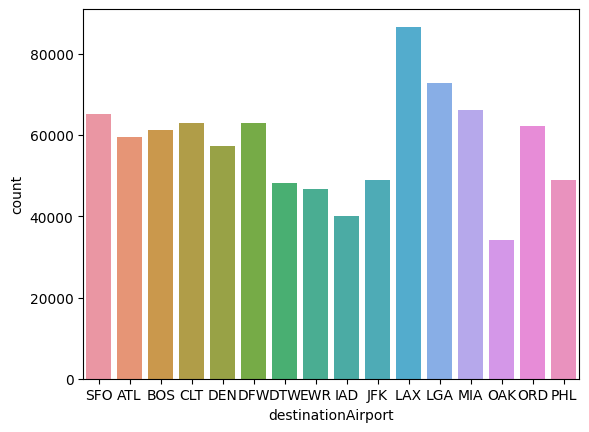

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df.destinationAirport)

<Axes: xlabel='isNonStop', ylabel='count'>

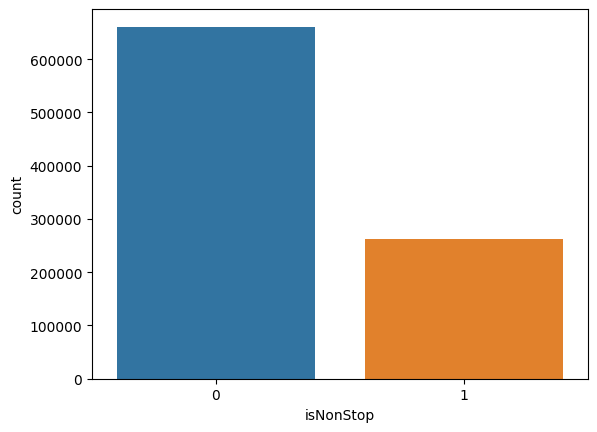

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df.isNonStop)

<Axes: xlabel='startingAirport', ylabel='count'>

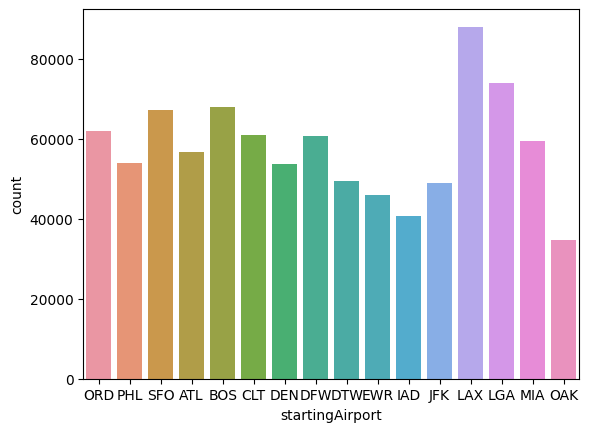

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df.startingAirport)

<Axes: xlabel='baseFare', ylabel='totalFare'>

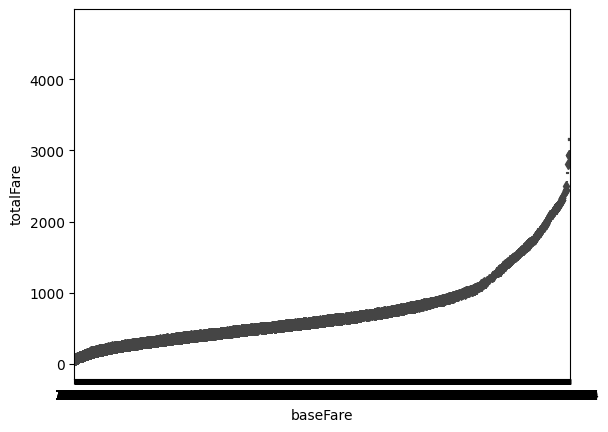

In [67]:
sns.boxplot(x=df.baseFare,y=df.totalFare)

In [69]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['legId'] = label_encoder.fit_transform(df['legId'])
print(df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\993012064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['legId'] = label_encoder.fit_transform(df['legId'])


         legId startingAirport destinationAirport fareBasisCode  elapsedDays   
0       389120             ORD                SFO         YA2AA            0  \
4       131326             PHL                ATL       S21NXS2            0   
5       163964             PHL                ATL       G14VXP5            1   
6       274982             PHL                ATL       G14VXP5            0   
7        68167             PHL                ATL       G14VXP5            1   
...        ...             ...                ...           ...          ...   
999995  316252             ATL                DTW      KA0QA0MQ            0   
999996  167171             ATL                DTW      KA7QA0MQ            0   
999997   81643             ATL                DTW      KA7QA0MQ            0   
999998  358803             ATL                DTW      HA7QA0MQ            0   
999999  395594             ATL                EWR      LAA7AHBN            0   

        isBasicEconomy  isRefundable  i

In [70]:
df

,legId,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsDurationInSeconds,segmentsDistance,segmentsEquipmentDescription,segmentsCabinCode
0,389120,ORD,SFO,YA2AA,0,0,0,0,2195.72,2384.00,...,1653932760||1653940140,2022-05-30T10:46:00.000-07:00||2022-05-30T12:4...,SNA||SFO,ORD||SNA,Alaska Airlines||Alaska Airlines,AS||AS,15600||5040,1726||373,Boeing 737 MAX 8Embraer 175,coachcoach
4,131326,PHL,ATL,S21NXS2,0,0,0,1,71.98,91.98,...,1653957780,2022-05-30T20:43:00.000-04:00,ATL,PHL,Frontier Airlines,F9,8280,667,Airbus A321,coach
5,163964,PHL,ATL,G14VXP5,1,0,0,0,84.08,119.59,...,1653971640||1653996720,2022-05-31T00:34:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,9240||5520,860||399,,coachcoach
6,274982,PHL,ATL,G14VXP5,0,0,0,0,84.08,119.59,...,1653916980||1653951120,2022-05-30T09:23:00.000-04:00||2022-05-30T18:5...,RDU||ATL,PHL||RDU,Frontier Airlines||Frontier Airlines,F9||F9,5280||5400,339||356,,coachcoach
7,68167,PHL,ATL,G14VXP5,1,0,0,0,84.08,119.59,...,1653963180||1653996720,2022-05-30T22:13:00.000-04:00||2022-05-31T07:3...,MCO||ATL,PHL||MCO,Frontier Airlines||Frontier Airlines,F9||F9,9840||5520,860||399,Airbus A321,coachcoach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,316252,ATL,DTW,KA0QA0MQ,0,0,0,0,481.86,541.60,...,1651236960||1651243980,2022-04-29T08:56:00.000-04:00||2022-04-29T10:5...,CLE||DTW,ATL||CLE,Delta||Delta,DL||DL,6060||3060,556||93,Airbus A319Canadair Regional Jet 900,coachcoach
999996,167171,ATL,DTW,KA7QA0MQ,0,0,0,0,528.38,591.61,...,1651236420||1651245900,2022-04-29T08:47:00.000-04:00||2022-04-29T11:2...,CMH||DTW,ATL||CMH,Delta||Delta,DL||DL,5520||3720,449||161,Boeing 737-900Canadair Regional Jet 900,coachcoach
999997,81643,ATL,DTW,KA7QA0MQ,0,0,0,0,528.37,597.20,...,1651237080||1651265520,2022-04-29T08:58:00.000-04:00||2022-04-29T16:5...,CHA||DTW,ATL||CHA,Delta||Delta,DL||DL,2880||6660,107||515,Boeing 717Canadair Regional Jet,coachcoach
999998,358803,ATL,DTW,HA7QA0MQ,0,0,0,0,714.42,797.20,...,1651237320||1651258680,2022-04-29T09:02:00.000-04:00||2022-04-29T14:5...,ORF||DTW,ATL||ORF,Delta||Delta,DL||DL,5520||6780,517||527,Airbus A320Canadair Regional Jet 900,coachcoach


In [71]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['startingAirport'] = label_encoder.fit_transform(df['startingAirport'])
print(df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\1652695655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['startingAirport'] = label_encoder.fit_transform(df['startingAirport'])


         legId  startingAirport destinationAirport fareBasisCode  elapsedDays   
0       389120               13                SFO         YA2AA            0  \
4       131326               14                ATL       S21NXS2            0   
5       163964               14                ATL       G14VXP5            1   
6       274982               14                ATL       G14VXP5            0   
7        68167               14                ATL       G14VXP5            1   
...        ...              ...                ...           ...          ...   
999995  316252                0                DTW      KA0QA0MQ            0   
999996  167171                0                DTW      KA7QA0MQ            0   
999997   81643                0                DTW      KA7QA0MQ            0   
999998  358803                0                DTW      HA7QA0MQ            0   
999999  395594                0                EWR      LAA7AHBN            0   

        isBasicEconomy  isR

In [72]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['destinationAirport'] = label_encoder.fit_transform(df['destinationAirport'])
print(df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\2793874495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['destinationAirport'] = label_encoder.fit_transform(df['destinationAirport'])


         legId  startingAirport  destinationAirport fareBasisCode   
0       389120               13                  15         YA2AA  \
4       131326               14                   0       S21NXS2   
5       163964               14                   0       G14VXP5   
6       274982               14                   0       G14VXP5   
7        68167               14                   0       G14VXP5   
...        ...              ...                 ...           ...   
999995  316252                0                   5      KA0QA0MQ   
999996  167171                0                   5      KA7QA0MQ   
999997   81643                0                   5      KA7QA0MQ   
999998  358803                0                   5      HA7QA0MQ   
999999  395594                0                   6      LAA7AHBN   

        elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare   
0                 0               0             0          0   2195.72  \
4                 0    

In [73]:
#fareBasisCode
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['segmentsArrivalTimeRaw'] = label_encoder.fit_transform(df['segmentsArrivalTimeRaw'])
print(df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\1783244127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['segmentsArrivalTimeRaw'] = label_encoder.fit_transform(df['segmentsArrivalTimeRaw'])


         legId  startingAirport  destinationAirport fareBasisCode   
0       389120               13                  15         YA2AA  \
4       131326               14                   0       S21NXS2   
5       163964               14                   0       G14VXP5   
6       274982               14                   0       G14VXP5   
7        68167               14                   0       G14VXP5   
...        ...              ...                 ...           ...   
999995  316252                0                   5      KA0QA0MQ   
999996  167171                0                   5      KA7QA0MQ   
999997   81643                0                   5      KA7QA0MQ   
999998  358803                0                   5      HA7QA0MQ   
999999  395594                0                   6      LAA7AHBN   

        elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare   
0                 0               0             0          0   2195.72  \
4                 0    

In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['legId'] = label_encoder.fit_transform(df['legId'])
print(df)

         legId  startingAirport  destinationAirport fareBasisCode   
0       389120               13                  15         YA2AA  \
4       131326               14                   0       S21NXS2   
5       163964               14                   0       G14VXP5   
6       274982               14                   0       G14VXP5   
7        68167               14                   0       G14VXP5   
...        ...              ...                 ...           ...   
999995  316252                0                   5      KA0QA0MQ   
999996  167171                0                   5      KA7QA0MQ   
999997   81643                0                   5      KA7QA0MQ   
999998  358803                0                   5      HA7QA0MQ   
999999  395594                0                   6      LAA7AHBN   

        elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare   
0                 0               0             0          0   2195.72  \
4                 0    

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\993012064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['legId'] = label_encoder.fit_transform(df['legId'])


In [82]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['fareBasisCode'] = label_encoder.fit_transform(df['fareBasisCode'])
print(df)

         legId  startingAirport  destinationAirport  fareBasisCode   
0       389120               13                  15           4388  \
4       131326               14                   0           2484   
5       163964               14                   0            291   
6       274982               14                   0            291   
7        68167               14                   0            291   
...        ...              ...                 ...            ...   
999995  316252                0                   5            767   
999996  167171                0                   5            800   
999997   81643                0                   5            800   
999998  358803                0                   5            563   
999999  395594                0                   6           1186   

        elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare   
0                 0               0             0          0   2195.72  \
4          

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\2061558100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fareBasisCode'] = label_encoder.fit_transform(df['fareBasisCode'])


In [83]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['segmentsArrivalAirportCode'] = label_encoder.fit_transform(df['segmentsArrivalAirportCode'])
print(df)

         legId  startingAirport  destinationAirport  fareBasisCode   
0       389120               13                  15           4388  \
4       131326               14                   0           2484   
5       163964               14                   0            291   
6       274982               14                   0            291   
7        68167               14                   0            291   
...        ...              ...                 ...            ...   
999995  316252                0                   5            767   
999996  167171                0                   5            800   
999997   81643                0                   5            800   
999998  358803                0                   5            563   
999999  395594                0                   6           1186   

        elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare   
0                 0               0             0          0   2195.72  \
4          

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\1268041984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['segmentsArrivalAirportCode'] = label_encoder.fit_transform(df['segmentsArrivalAirportCode'])


In [84]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['segmentsDepartureAirportCode'] = label_encoder.fit_transform(df['segmentsDepartureAirportCode'])
print(df)

         legId  startingAirport  destinationAirport  fareBasisCode   
0       389120               13                  15           4388  \
4       131326               14                   0           2484   
5       163964               14                   0            291   
6       274982               14                   0            291   
7        68167               14                   0            291   
...        ...              ...                 ...            ...   
999995  316252                0                   5            767   
999996  167171                0                   5            800   
999997   81643                0                   5            800   
999998  358803                0                   5            563   
999999  395594                0                   6           1186   

        elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare   
0                 0               0             0          0   2195.72  \
4          

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\1468071550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['segmentsDepartureAirportCode'] = label_encoder.fit_transform(df['segmentsDepartureAirportCode'])


In [97]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['segmentsAirlineName'] = label_encoder.fit_transform(df['segmentsAirlineName'])
print(df)

         legId  startingAirport  destinationAirport  fareBasisCode   
0       389120               13                  15           4388  \
4       131326               14                   0           2484   
5       163964               14                   0            291   
6       274982               14                   0            291   
7        68167               14                   0            291   
...        ...              ...                 ...            ...   
999995  316252                0                   5            767   
999996  167171                0                   5            800   
999997   81643                0                   5            800   
999998  358803                0                   5            563   
999999  395594                0                   6           1186   

        elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare   
0                 0               0             0          0   2195.72  \
4          

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\1505929376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['segmentsAirlineName'] = label_encoder.fit_transform(df['segmentsAirlineName'])


In [86]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['segmentsAirlineCode'] = label_encoder.fit_transform(df['segmentsAirlineCode'])
print(df)

         legId  startingAirport  destinationAirport  fareBasisCode   
0       389120               13                  15           4388  \
4       131326               14                   0           2484   
5       163964               14                   0            291   
6       274982               14                   0            291   
7        68167               14                   0            291   
...        ...              ...                 ...            ...   
999995  316252                0                   5            767   
999996  167171                0                   5            800   
999997   81643                0                   5            800   
999998  358803                0                   5            563   
999999  395594                0                   6           1186   

        elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare   
0                 0               0             0          0   2195.72  \
4          

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\348238501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['segmentsAirlineCode'] = label_encoder.fit_transform(df['segmentsAirlineCode'])


In [87]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['segmentsDurationInSeconds'] = label_encoder.fit_transform(df['segmentsDurationInSeconds'])
print(df)

         legId  startingAirport  destinationAirport  fareBasisCode   
0       389120               13                  15           4388  \
4       131326               14                   0           2484   
5       163964               14                   0            291   
6       274982               14                   0            291   
7        68167               14                   0            291   
...        ...              ...                 ...            ...   
999995  316252                0                   5            767   
999996  167171                0                   5            800   
999997   81643                0                   5            800   
999998  358803                0                   5            563   
999999  395594                0                   6           1186   

        elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare   
0                 0               0             0          0   2195.72  \
4          

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\1848571341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['segmentsDurationInSeconds'] = label_encoder.fit_transform(df['segmentsDurationInSeconds'])


In [88]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['segmentsDistance'] = label_encoder.fit_transform(df['segmentsDistance'])
print(df)

         legId  startingAirport  destinationAirport  fareBasisCode   
0       389120               13                  15           4388  \
4       131326               14                   0           2484   
5       163964               14                   0            291   
6       274982               14                   0            291   
7        68167               14                   0            291   
...        ...              ...                 ...            ...   
999995  316252                0                   5            767   
999996  167171                0                   5            800   
999997   81643                0                   5            800   
999998  358803                0                   5            563   
999999  395594                0                   6           1186   

        elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare   
0                 0               0             0          0   2195.72  \
4          

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\130957785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['segmentsDistance'] = label_encoder.fit_transform(df['segmentsDistance'])


In [90]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['segmentsEquipmentDescription'] = label_encoder.fit_transform(df['segmentsEquipmentDescription'])
print(df)

         legId  startingAirport  destinationAirport  fareBasisCode   
0       389120               13                  15           4388  \
4       131326               14                   0           2484   
5       163964               14                   0            291   
6       274982               14                   0            291   
7        68167               14                   0            291   
...        ...              ...                 ...            ...   
999995  316252                0                   5            767   
999996  167171                0                   5            800   
999997   81643                0                   5            800   
999998  358803                0                   5            563   
999999  395594                0                   6           1186   

        elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare   
0                 0               0             0          0   2195.72  \
4          

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\282714289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['segmentsEquipmentDescription'] = label_encoder.fit_transform(df['segmentsEquipmentDescription'])


In [93]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['segmentsCabinCode'] = label_encoder.fit_transform(df['segmentsCabinCode'])
print(df)

         legId  startingAirport  destinationAirport  fareBasisCode   
0       389120               13                  15           4388  \
4       131326               14                   0           2484   
5       163964               14                   0            291   
6       274982               14                   0            291   
7        68167               14                   0            291   
...        ...              ...                 ...            ...   
999995  316252                0                   5            767   
999996  167171                0                   5            800   
999997   81643                0                   5            800   
999998  358803                0                   5            563   
999999  395594                0                   6           1186   

        elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare   
0                 0               0             0          0   2195.72  \
4          

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\1794648880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['segmentsCabinCode'] = label_encoder.fit_transform(df['segmentsCabinCode'])


In [98]:
df

,legId,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,seatsRemaining,...,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsDurationInSeconds,segmentsDistance,segmentsEquipmentDescription,segmentsCabinCode,TotalFare,segmentsAirlineName\t
0,389120,13,15,4388,0,0,0,0,2195.72,7,...,3029,2711,1,27,11580,1198,1198,8,2384.00,1
4,131326,14,0,2484,0,0,0,1,71.98,4,...,45,2735,54,61,42722,5163,684,4,91.98,54
5,163964,14,0,291,1,0,0,0,84.08,4,...,1767,2839,55,62,46323,5986,0,8,119.59,55
6,274982,14,0,291,0,0,0,0,84.08,4,...,2479,2890,55,62,26019,3073,0,8,119.59,55
7,68167,14,0,291,1,0,0,0,84.08,4,...,1767,2839,55,62,48189,5986,684,8,119.59,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,316252,0,5,767,0,0,0,0,481.86,4,...,471,27,44,51,30861,4340,348,8,541.60,44
999996,167171,0,5,800,0,0,0,0,528.38,6,...,619,55,44,51,27630,3720,1884,8,591.61,44
999997,81643,0,5,800,0,0,0,0,528.37,8,...,425,23,44,51,17342,117,1076,8,597.20,44
999998,358803,0,5,563,0,0,0,0,714.42,9,...,2170,185,44,51,27729,4015,618,8,797.20,44


In [100]:
TotalFare=df.TotalFare

In [101]:
df.drop(columns='TotalFare',inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\1977366762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='TotalFare',inplace=True)


In [126]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['baseFare'] = label_encoder.fit_transform(df['baseFare'])
print(df)

         legId  startingAirport  destinationAirport  fareBasisCode   
0       389120               13                  15           4388  \
4       131326               14                   0           2484   
5       163964               14                   0            291   
6       274982               14                   0            291   
7        68167               14                   0            291   
...        ...              ...                 ...            ...   
999995  316252                0                   5            767   
999996  167171                0                   5            800   
999997   81643                0                   5            800   
999998  358803                0                   5            563   
999999  395594                0                   6           1186   

        elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare   
0                 0               0             0          0      6873  \
4          

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\3052910681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['baseFare'] = label_encoder.fit_transform(df['baseFare'])


In [128]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['TotalFare'] = label_encoder.fit_transform(df['TotalFare'])
print(df)

         legId  startingAirport  destinationAirport  fareBasisCode   
0       389120               13                  15           4388  \
4       131326               14                   0           2484   
5       163964               14                   0            291   
6       274982               14                   0            291   
7        68167               14                   0            291   
...        ...              ...                 ...            ...   
999995  316252                0                   5            767   
999996  167171                0                   5            800   
999997   81643                0                   5            800   
999998  358803                0                   5            563   
999999  395594                0                   6           1186   

        elapsedDays  isBasicEconomy  isRefundable  isNonStop  baseFare   
0                 0               0             0          0      6873  \
4          

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\341219154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalFare'] = label_encoder.fit_transform(df['TotalFare'])


In [130]:
df

,legId,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,seatsRemaining,...,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsDurationInSeconds,segmentsDistance,segmentsEquipmentDescription,segmentsCabinCode,segmentsAirlineName\t,TotalFare
0,389120,13,15,4388,0,0,0,0,6873,7,...,3029,2711,1,27,11580,1198,1198,8,1,13710
4,131326,14,0,2484,0,0,0,1,80,4,...,45,2735,54,61,42722,5163,684,4,54,112
5,163964,14,0,291,1,0,0,0,117,4,...,1767,2839,55,62,46323,5986,0,8,55,247
6,274982,14,0,291,0,0,0,0,117,4,...,2479,2890,55,62,26019,3073,0,8,55,247
7,68167,14,0,291,1,0,0,0,117,4,...,1767,2839,55,62,48189,5986,684,8,55,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,316252,0,5,767,0,0,0,0,3024,4,...,471,27,44,51,30861,4340,348,8,44,6340
999996,167171,0,5,800,0,0,0,0,3446,6,...,619,55,44,51,27630,3720,1884,8,44,7173
999997,81643,0,5,800,0,0,0,0,3445,8,...,425,23,44,51,17342,117,1076,8,44,7264
999998,358803,0,5,563,0,0,0,0,4730,9,...,2170,185,44,51,27729,4015,618,8,44,9992


In [103]:
df['TotalFare']=TotalFare

C:\Users\DELL\AppData\Local\Temp\ipykernel_29864\89383817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalFare']=TotalFare


In [104]:
df.columns

Index(['legId', 'startingAirport', 'destinationAirport', 'fareBasisCode',
       'elapsedDays', 'isBasicEconomy', 'isRefundable', 'isNonStop',
       'baseFare', 'seatsRemaining', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsDurationInSeconds', 'segmentsDistance',
       'segmentsEquipmentDescription', 'segmentsCabinCode',
       'segmentsAirlineName\t', 'TotalFare'],
      dtype='object')

In [131]:
#independant variable 
x=df.iloc[:,:21].values

#dependant variable
y=df.iloc[:,22].values

In [132]:
x

array([[389120, 13, 15, ..., 27, 11580, 1198],
       [131326, 14, 0, ..., 61, 42722, 5163],
       [163964, 14, 0, ..., 62, 46323, 5986],
       ...,
       [81643, 0, 5, ..., 51, 17342, 117],
       [358803, 0, 5, ..., 51, 27729, 4015],
       [395594, 0, 6, ..., 69, 43004, 5698]], dtype=object)

In [133]:
y

array([8, 4, 8, ..., 8, 8, 4])

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [135]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

ValueError: could not convert string to float: '1651839600||1651859100'

In [136]:
df.size

23106625

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924265 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   legId                              924265 non-null  int64  
 1   startingAirport                    924265 non-null  int32  
 2   destinationAirport                 924265 non-null  int32  
 3   fareBasisCode                      924265 non-null  int32  
 4   elapsedDays                        924265 non-null  int64  
 5   isBasicEconomy                     924265 non-null  int64  
 6   isRefundable                       924265 non-null  int64  
 7   isNonStop                          924265 non-null  int64  
 8   baseFare                           924265 non-null  int64  
 9   seatsRemaining                     924265 non-null  int64  
 10  totalTravelDistance                924265 non-null  float64
 11  segmentsDepartureTimeEpochSeconds  924265 no